## Topological Sorting

```
Given a DAG(direct acyclic graph), return the Topological Sorting of a given graph.

Detailed explanation ( Input/output format, Notes, Images )
Input Format:
The first line of input contains an integer T, the number of test cases.
The first line of each test case contains two single space-separated integers V, and E.
From the second line onwards of each test case, the next 'E' lines will denote the edges of the graph where every edge is defined by two single space-separated integers 'a' and 'b', which signifies an edge from vertex 'a’ to vertex 'b'.
Output Format :
For each test case, the output will be "Correct" if the topological sorting returned is correct else it will be "Incorrect".
Constraints:
1 <= T <= 10
1 <= V <= 1000
0 <= E <= 3000
0 <= U, V <= V-1

Time Limit: 1sec
Sample Input 1:
1
5 4
0 2
1 2
3 1
0 4
Sample Output 1:
Correct
Sample Output 1 Explanation:
One correct sort order is : 3 1 0 4 2.
```

```
create and empty stack s = [] to store the nodes in topological order
create a visited list
create a for loop that goes from 0 to V-1
  if node hasn't been visited call dfs(node)
  now that the work at the node has finished add it to the stack

dfs(node):
  set visited to True for node
  run a for loop through adjacency list:
    if node hasn't been visited call dfs(neighbour)
```

In [ ]:
"""
adj receives the graph as an adjacency list.
V and E receive the number of vertices and edges respectively
"""
def topologicalSort(adj, V, E):
  # #stack to store nodes
  # s = []
  # #visited or not
  # visited = [False] * V

  # def dfs(node):
  #   visited[node] = True
  #   for neighbour in adj[node]:
  #     if not visited[neighbour]:
  #       dfs(neighbour)
  #   s.append(node)

  # for node in range(V):
  #   if not visited[node]:
  #     dfs(node)

  # return s[::-1]
  return []

## Kruskal's Algorithm

```
Given an undirected, connected and weighted graph G(V, E) with V number of vertices (which are numbered from 0 to V-1) and E number of edges.

Find and print the Minimum Spanning Tree (MST) using Kruskal's algorithm.

For printing MST follow the steps -

1. In one line, print an edge which is part of MST in the format -
v1 v2 w
where, v1 and v2 are the vertices of the edge which is included in MST and whose weight is w. And v1  <= v2 i.e. print the smaller vertex first while printing an edge.
2. Print V-1 edges in above format in different lines.
Note : Order of different edges doesn't matter.
Detailed explanation ( Input/output format, Notes, Images )
Constraints :
2 <= V, E <= 10^5
Time Limit: 1 sec
Sample Input 1 :
4 4
0 1 3
0 3 5
1 2 1
2 3 8
Input Graph
```
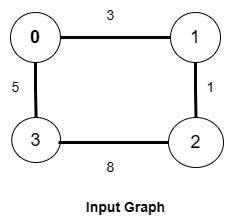
```

Sample Output 1 :
1 2 1
0 1 3
0 3 5
```
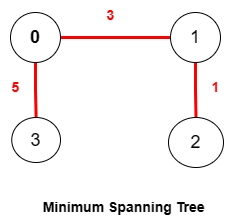

In [ ]:
class UnionFind:
    def __init__(self, n):
        self.parent = list(range(n))
        self.rank = [0] * n

    def find(self, u):
        if self.parent[u] != u:
            self.parent[u] = self.find(self.parent[u])
        return self.parent[u]

    def union(self, u, v):
        root_u = self.find(u)
        root_v = self.find(v)
        if root_u != root_v:
            if self.rank[root_u] > self.rank[root_v]:
                self.parent[root_v] = root_u
            elif self.rank[root_u] < self.rank[root_v]:
                self.parent[root_u] = root_v
            else:
                self.parent[root_v] = root_u
                self.rank[root_u] += 1

def kruskal(V, edges):
    # Sort edges by weight
    edges.sort(key=lambda edge: edge[2])

    # Create a union-find data structure
    uf = UnionFind(V)

    mst = []

    for u, v, weight in edges:
        if uf.find(u) != uf.find(v):
            uf.union(u, v)
            mst.append((u, v, weight))
            if len(mst) == V - 1:
                break

    return mst

# Input Reading
import sys
input = sys.stdin.read
data = input().split()

V = int(data[0])
E = int(data[1])

edges = []
index = 2
for _ in range(E):
    u = int(data[index])
    v = int(data[index + 1])
    weight = int(data[index + 2])
    edges.append((u, v, weight))
    index += 3

# Find the MST using Kruskal's algorithm
mst = kruskal(V, edges)

# Print the MST edges
for u, v, weight in mst:
    if u > v:
        u, v = v, u
    print(u, v, weight)

## Prim's Algorithm

```
Given an undirected, connected and weighted graph G(V, E) with V number of vertices (which are numbered from 0 to V-1) and E number of edges.



Find and print the Minimum Spanning Tree (MST) using Prim's algorithm.



For printing MST follow the steps -

1. In one line, print an edge which is part of MST in the format -
v1 v2 w
where, v1 and v2 are the vertices of the edge which is included in MST and whose weight is w. And v1  <= v2 i.e. print the smaller vertex first while printing an edge.
2. Print V-1 edges in above format in different lines.
Note: Order of different edges doesn't matter.
Detailed explanation ( Input/output format, Notes, Images )
Input Format:
Line 1: Two Integers V and E (separated by space)
Next E lines: Three integers ei, ej and wi, denoting that there exists an edge between vertex ei and vertex ej with weight wi (separated by space)
Output Format:
Print the MST, as described in the task.
Constraints :
2 <= V, E <= 10^5
1 <= Wi <= 10^5
Time Limit: 1 sec
Sample Input 1 :
4 4
0 1 3
0 3 5
1 2 1
2 3 8
Input Graph
```
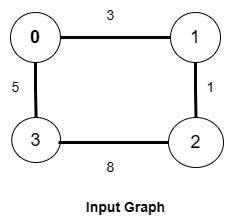
```



Sample Output 1 :
0 1 3
1 2 1
0 3 5
```
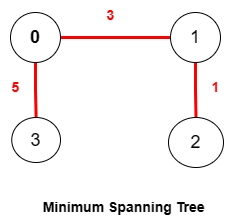

In [ ]:
import sys

class Graph:
    def __init__(self, nVertices):
        self.nVertices = nVertices
        self.adjMatrix = [[0 for i in range(nVertices)] for j in range(nVertices)]

    def addEdge(self, v1, v2, wt):
        self.adjMatrix[v1][v2] = wt
        self.adjMatrix[v2][v1] = wt

    def __getMinVertex(self, visited, weight):
        minVertex = -1
        for i in range(self.nVertices):
            if not visited[i] and (minVertex == -1 or weight[minVertex] > weight[i]):
                minVertex = i
        return minVertex

    def prims(self):
        visited = [False for i in range(self.nVertices)]
        parent = [-1 for i in range(self.nVertices)]
        weight = [sys.maxsize for i in range(self.nVertices)]

        for i in range(self.nVertices - 1):
            minVertex = self.__getMinVertex(visited, weight)
            visited[minVertex] = True
            for j in range(self.nVertices):
                if self.adjMatrix[minVertex][j] > 0 and not visited[j]:
                    if weight[j] > self.adjMatrix[minVertex][j]:
                        weight[j] = self.adjMatrix[minVertex][j]
                        parent[j] = minVertex

        for i in range(1, self.nVertices):
            if parent[i] > i:
                print(str(i) + " " + str(parent[i]) + " " + str(weight[i]))
            else:
                print(str(parent[i]) + " " + str(i) + " " + str(weight[i]))

    def removeEdge(self, v1, v2):
        if not self.containsEdge(v1, v2):
            return
        self.adjMatrix[v1][v2] = 0
        self.adjMatrix[v2][v2] = 0

    def containsEdge(self, v1, v2):
        return True if self.adjMatrix[v1][v2] > 0 else False

li = [int(ele) for ele in input().split()]
n = li[0]
E = li[1]
g = Graph(n)
for i in range(E):
    curr_edge = [int(ele) for ele in input().split()]
    g.addEdge(curr_edge[0], curr_edge[1], curr_edge[2])

g.prims()

## Dijkstra's Algorithm

```
Given an undirected, connected and weighted graph G(V, E) with V number of vertices (which are numbered from 0 to V-1) and E number of edges.

Find and print the shortest distance from the source vertex (i.e. Vertex 0) to all other vertices (including source vertex also) using Dijkstra's Algorithm.

Detailed explanation ( Input/output format, Notes, Images )
Input Format :
Line 1: Two Integers V and E (separated by space)
Next E lines : Three integers ei, ej and wi, denoting that there exists an edge between vertex ei and vertex ej with weight wi (separated by space)
Output Format :
For each vertex, print its vertex number and its distance from source, in a separate line. The vertex number and its distance needs to be separated by a single space.
Note : Order of vertices in output doesn't matter.
Constraints :
2 <= V, E <= 10^5
Time Limit: 1 sec
Sample Input 1 :
4 4
0 1 3
0 3 5
1 2 1
2 3 8
Input Graph
```
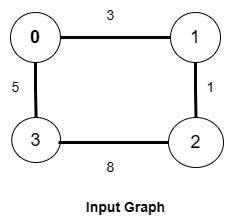
```
Sample Output 1 :
0 0
1 3
2 4
3 5
```
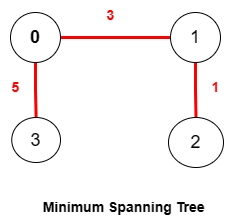

In [ ]:
import sys
import queue

class Graph:
    def __init__(self, nVertices):
        self.nVertices = nVertices
        self.adjMatrix = [[0 for i in range(nVertices)] for j in range(nVertices)]

    def addEdge(self, v1, v2, wt):
        self.adjMatrix[v1][v2] = wt
        self.adjMatrix[v2][v1] = wt

    def __bfsHelper(self, s, visited):
        q = queue.Queue()
        q.put(s)
        visited[s] = True
        while not q.empty():
            u = q.get()
            print(u)
            for v in range(self.nVertices):
                if self.adjMatrix[u][v] > 0 and not visited[v]:
                    q.put(v)
                    visited[v] = True

    def bfs(self):
        visited = [False for i in range(self.nVertices)]
        for i in range(self.nVertices):
            if not visited[i]:
                self.__bfsHelper(i, visited)

    def __getMinVertex(self, visited, weight):
        minVertex = -1
        for i in range(self.nVertices):
            if not visited[i] and (minVertex == -1 or weight[minVertex] > weight[i]):
                minVertex = i
        return minVertex

    def prims(self):
        visited = [False for i in range(self.nVertices)]
        parent = [-1 for i in range(self.nVertices)]
        weight = [sys.maxsize for i in range(self.nVertices)]
        for i in range(self.nVertices - 1):
            minVertex = self.__getMinVertex(visited, weight)
            visited[minVertex] = True
            for j in range(self.nVertices):
                if self.adjMatrix[minVertex][j] > 0 and not visited[j]:
                    if weight[j] > self.adjMatrix[minVertex][j]:
                        weight[j] = self.adjMatrix[minVertex][j]
                        parent[j] = minVertex
        for i in range(1, self.nVertices):
            if parent[i] > i:
                print(str(i) + " " + str(parent[i]) + " " + str(weight[i]))
            else:
                print(str(parent[i]) + " " + str(i) + " " + str(weight[i]))

    def __getMinVertexD(self, visited, weight):
        minVertex = -1
        for i in range(self.nVertices):
            if not visited[i] and (minVertex == -1 or weight[minVertex] > weight[i]):
                minVertex = i
        return minVertex

    def djikstra(self):
        visited = [False for i in range(self.nVertices)]
        dist = [sys.maxsize for i in range(self.nVertices)]
        dist[0] = 0
        for i in range(self.nVertices - 1):
            minVertex = self.__getMinVertexD(visited, dist)
            visited[minVertex] = True
            for j in range(self.nVertices):
                if self.adjMatrix[minVertex][j] > 0 and not visited[j]:
                    if dist[j] > dist[minVertex] + self.adjMatrix[minVertex][j]:
                        dist[j] = dist[minVertex] + self.adjMatrix[minVertex][j]
        for i in range(self.nVertices):
            print(str(i) + " " + str(dist[i]))

    def removeEdge(self, v1, v2):
        if not self.containsEdge(v1, v2):
            return
        self.adjMatrix[v1][v2] = 0
        self.adjMatrix[v2][v2] = 0

    def containsEdge(self, v1, v2):
        return True if self.adjMatrix[v1][v2] > 0 else False

li = [int(ele) for ele in input().split()]
n = li[0]
E = li[1]
g = Graph(n)
for i in range(E):
    curr_edge = [int(ele) for ele in input().split()]
    g.addEdge(curr_edge[0], curr_edge[1], curr_edge[2])
g.djikstra()

## Shortest path in a Binary Maze

```
Given a maze in the form of a binary rectangular matrix of size M*N, where each element can either be 0 or 1, the task is to find the length of the shortest path in a maze from a given source cell to a destination cell.

The path can only be created out of a cell if its value is 1 and at any given moment, we can only move one step in one of the four directions. The valid moves are:

Up: (x, y) -> (x - 1, y)
Left: (x, y) -> (x, y - 1)
Down: (x, y) -> (x + 1, y)
Right: (x, y) -> (x, y + 1)
If there is no path from a given source cell to a destination cell, return -1.

For example :
consider the binary matrix below. If source = (0, 0) and destination = (3, 4), the shortest path from source to destination has length 11.
example
```
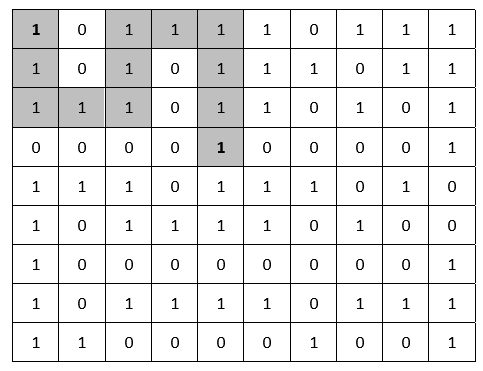
```

Detailed explanation ( Input/output format, Notes, Images )
Input Format :
The first line of input contains an integer ‘T’ representing the number of test cases. Then the test cases follow.

The first line of each test case contains two space-separated integers M and N, representing the number of rows and columns respectively.

Each of the next M lines contains N space-separated integers representing the matrix.

The last second line of each test case contains two space-separated integers denoting the coordinates of the source cell.

The last line of each test case contains two space-separated integers denoting the coordinates of the destination cell.

For example, the input for the binary matrix depicted in the below image would be:
example
```
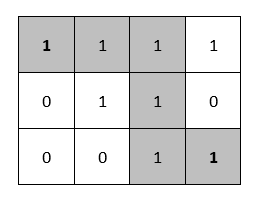
```

3 4
1 1 1 1
0 1 1 0
0 0 1 1
0 0
2 3
Explanation :

The first line represents that the given matrix has 3 rows and 4 columns.
Each of the next 3 lines contains 4 space-separated integers representing a row.
Last second line contains two space-separated integers representing coordinates of the source cell, i.e. (0, 0).
The last line contains two space-separated integers representing coordinates of the destination cell, i.e. (2, 3).
Output Format :
For each test case, print a single integer denoting the length of the shortest path between a given source cell to a destination cell. If such a path does not exist, print -1.

The output for each test case is in a separate line.
Note :
You do not need to print anything; it has already been taken care of. Just implement the given function.
Constraints :
1 <= T <= 10
1 <= M, N <= 100

Time Limit: 1sec
Sample Input 1 :
2
3 4
1 1 1 1
0 1 1 0
0 0 1 1
0 0
2 3
2 2
1 1
0 1
0 0
1 1
Sample Output 1 :
5
2
Explanation of Sample Input 1 :
```
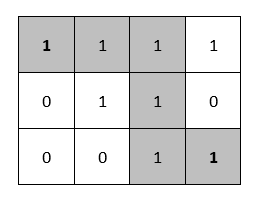
```
For the first test case, the shortest path between the source cell (0, 0) and destination cell (2,3) is highlighted in the figure below, having a length of 5.
example

For the second test case, the only path from the source cell to the destination cell has a length of 2.
Sample Input 2 :
2
2 2
1 1
1 1
0 1
1 1
2 2
1 0
0 1
0 0
1 1
Sample Output 2 :
1
-1
```

In [ ]:
"""
	Time complexity: O(M * N)
	Space complexity: O(M * N)

	Where M is number of rows and N is number of columns in the matrix
"""
from queue import Queue

# Function to find the shortest path between a given source cell to a destination cell
def shortestPathBinaryMatrix(matrix, src, dest):

    n = len(matrix)
    m = len(matrix[0])

    # Check source cell of the matrix have value 1
    if matrix[src[0]][src[1]]==0:
        return -1

    ans = 0

    visited = [[False] * m for i in range(n)]

    # Mark the source cell as visited
    visited[src[0]][src[1]] = 1

    # Create a queue for BFS
    q = Queue()
    q.put(src)

    # Array details of all 4 possible movements from a cell
    dx = [-1, 0, 0, 1]
    dy = [0, -1, 1, 0]

    # Do a BFS starting from source cell
    while not q.empty():
        sz = q.qsize()

        # Traverse the current level
        for i in range(sz):

            node = q.get()

            # If we have reached the destination cell, return current distance
            if node[0] == dest[0] and node[1] == dest[1]:
                return ans

            for j in range(4):
                newX = dx[j] + node[0]
                newY = dy[j] + node[1]

                # If adjacent cell is valid, has path and not visited yet, enqueue it
                if (newX >= 0 and newY >= 0 and newX < n and newY < m and visited[newX][newY]==0 and matrix[newX][newY]):
                    visited[newX][newY] = 1
                    q.put([newX, newY])

        # Increment distance by 1, as destination cell is not present in current level
        ans += 1

    # Return -1, if destination cannot be reached
    return -1

# Assignment

## Topological Sort

```
You are given a directed acyclic graph. Your task is to find any topological sorting of the graph.

A directed acyclic graph is a directed graph with no directed cycles.

Topological sorting for Directed Acyclic Graph (DAG) is a linear ordering of vertices such that for every directed edge from u to v, vertex u comes before v in the ordering.

For example-

For the given DAG-
```
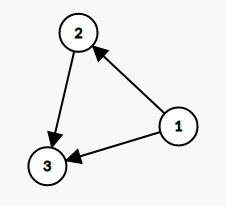
```


One of the possible topological sort will be-
1  2  3
Detailed explanation ( Input/output format, Notes, Images )
Input Format:
The first line of input contains an integer ‘T’ denoting the number of test cases to run. Then the test case follows.

The first line of each test case contains two single space-separated integers ‘N’, ‘M’, denoting the number of nodes and the number of edges respectively.

The next ‘M’ lines of each test case contain two single space-separated integers ‘U’, ‘V’ each denoting there is a directed edge from node ‘U’ to node ‘V’.
Output Format:
The only line of each test case will contain N single space-separated integers representing the topological sorting of the graph. You can print any valid sorting.

Print the output of each test case in a separate line.

Note:
You are not required to print the expected output, it has already been taken care of. Just implement the function.
Constraints:
1 <= T <= 100
1 <= N <= 5000
0 <= M <= min(5000, (N*(N-1))/2)
1 <= U, V <= N and U != V

Time Limit: 1sec
Sample Input 1 :
2
3 1
1 2
4 5
1 2
1 3
2 4
3 4
1 4
Sample Output 1 :
1 2 3
1 2 3 4
Explanation for Sample 1:
The DAG corresponding to the first test case will be-
```
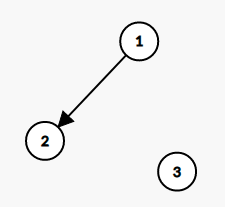
```

We can clearly see that one of the possible topological sorting will be 1 2 3.

The DAG corresponding to the second test case will be-
```
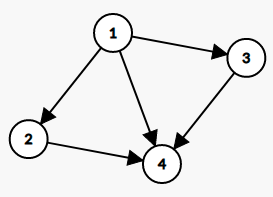
```

We can clearly see that one of the possible topological sorting will be 1 2 3 4.
Sample Input 2 :
1
5 0
Sample Output 2 :
5 4 3 2 1
```

In [ ]:
from collections import deque, defaultdict

def topologicalSort(edges, N, M):
    # Initialize the indegree and adjacency list
    indegree = [0] * (N + 1)
    adj = defaultdict(list)

    for u, v in edges:
        adj[u].append(v)
        indegree[v] += 1

    # Initialize the queue with nodes having indegree 0
    queue = deque([i for i in range(1, N + 1) if indegree[i] == 0])
    topological_order = []

    while queue:
        node = queue.popleft()
        topological_order.append(node)

        for neighbor in adj[node]:
            indegree[neighbor] -= 1
            if indegree[neighbor] == 0:
                queue.append(neighbor)

    return topological_order

## M - Coloring Problem

```
You are given an undirected graph with N nodes in the form of an adjacency matrix. You are also given an integer M.

Your task is to find if you can color the vertices of the graph using at most M colors such that no two adjacent vertices are of the same color.

For example:

If the given adjacency matrix is:
[0 1 0]
[1 0 1]
[0 1 0] and M = 3.

The given adjacency matrix tells us that node 1 is connected to node 2 and node 2 is connected to node 3.

So if we color vertex 1 with ‘red’, vertex 2 with ‘blue’, and vertex 3 with ‘red’, it is possible to color the given graph with two colors which is less than or equal to M.
Detailed explanation ( Input/output format, Notes, Images )
Input Format:
The first line of input contains a single integer T, representing the number of test cases or queries to be run. Then the T test cases follow.

The first line of the test case contains two space-separated integers N and M, denoting the number of vertices in the undirected graph and the number of colors respectively.

Each of the next N lines of each test case contains N integers denoting a row of the adjacency matrix of the undirected graph.
Output Format:
For each test case, you need to print a single line containing “Yes” if we can color the given graph with at most M colors. otherwise, print “No”.

The output of each test case will be printed in a separate line.
Note:
You are not required to print the expected output, it has already been taken care of. Just implement the given function.
Constraints:
1 ≤ T ≤ 10
1 ≤ N ≤ 20
1 ≤ M ≤ N

Time Limit: 1 sec.
Sample Input 1:
3
3 3
0 1 0
1 0 1
0 1 0
3 1
0 1 0
1 0 1
0 1 0
2 1
0 1
1 0
Sample Output 1:
Yes
No
No
Explanation of Input 1:
The first test case has already been explained in the example.

The second test case, the given adjacency matrix tells us that node 1 is connected to node 2 and node 2 is connected to node 3. We can see that at least two colors would be needed to color the graph. So it is not possible to color the graph in this case.

The third test case, the given adjacency matrix tells us that node 1 is connected to node 2. We can see that at least two colors would be needed to color the graph. So it is not possible to color the graph in this case.
Sample Input 2:
3
3 3
0 0 0
0 0 1
0 1 0
4 2
0 1 0 0
1 0 0 0
0 0 0 1
0 0 1 0
4 1
0 1 0 0
1 0 0 0
0 0 0 1
0 0 1 0
Sample Output 2
Yes
Yes
No
```

In [ ]:
def is_valid_color(graph, color, node, c):
    for neighbor in range(len(graph)):
        if graph[node][neighbor] == 1 and color[neighbor] == c:
            return False
    return True

def graph_coloring(graph, m, color, node):
    if node == len(graph):
        return True

    for c in range(1, m+1):
        if is_valid_color(graph, color, node, c):
            color[node] = c
            if graph_coloring(graph, m, color, node + 1):
                return True
            color[node] = 0

    return False

def can_color_graph(N, M, graph):
    color = [0] * N
    return graph_coloring(graph, M, color, 0)

def graphColoring(graph, N, M):
  if can_color_graph(N, M, graph):
    return "Yes"
  else:
    return "No"

## Minimum Spanning Tree

```
You are given an undirected, connected and weighted graph G(V, E), consisting of V number of vertices (numbered from 0 to V-1) and E number of edges.

Find and print the total weight of the Minimum Spanning Tree (MST) using Kruskal's algorithm.

By definition, a minimum weight spanning tree is a subset of the edges of a connected, edge-weighted undirected graph that connects all the vertices together, without any cycles and with the minimum possible total edge weight.

Detailed explanation ( Input/output format, Notes, Images )
Input Format :
The first input contains two integers, N and M, the number of vertices and edges in the graph respectively.

The next M input lines contains three integers X, Y and W each, representing each edge of the graph.

The edge X Y W represents an edge between vertices X and Y, having weight W.
Note:
The edges will be passed to the function as a array of arrays. Each array will contain 3 integers, X, Y, and W in that order.
Output Format :
Print the total weight of the minimum spanning tree.
Note:
You don't explicitly have to print anything, just return the total weight.
Constraints :
2 <= V <= 10^5
1 <= E <= 3 * 10^5
0 <= X < N
0 <= Y < N
1 <= W <= 10^4

where V and E represent the number of vertices and edges respectively.
X and Y represent the vertices between which there is an edge.
W is the weight of the edge.

Time limit: 1sec
Sample Input 1 :
4 4
0 1 3
0 3 5
1 2 1
2 3 8
Sample Output 1 :
9
Explanation for Sample Input 1:
The edge (2,3) having weight 8 will be excluded from the MST. The total weight of the MST then will be 1 + 3 + 5 = 9.
Sample Input 2:
4 4
1 2 6
2 3 2
1 3 2
1 0 2
Sample Output 2:
6
```

In [ ]:
class UnionFind:
    def __init__(self, size):
        self.parent = list(range(size))
        self.rank = [0] * size

    def find(self, p):
        if self.parent[p] != p:
            self.parent[p] = self.find(self.parent[p])
        return self.parent[p]

    def union(self, p, q):
        rootP = self.find(p)
        rootQ = self.find(q)

        if rootP != rootQ:
            if self.rank[rootP] > self.rank[rootQ]:
                self.parent[rootQ] = rootP
            elif self.rank[rootP] < self.rank[rootQ]:
                self.parent[rootP] = rootQ
            else:
                self.parent[rootQ] = rootP
                self.rank[rootP] += 1

def kruskal(n, edges):
    # Sort edges based on their weights
    edges.sort(key=lambda edge: edge[2])

    uf = UnionFind(n)
    mst_weight = 0
    edge_count = 0

    for u, v, weight in edges:
        if uf.find(u) != uf.find(v):
            uf.union(u, v)
            mst_weight += weight
            edge_count += 1
            # Stop if we've added n-1 edges
            if edge_count == n - 1:
                break

    return mst_weight

# Input Reading
import sys
input = sys.stdin.read
data = input().split()

index = 0
N = int(data[index])
M = int(data[index + 1])
index += 2

edges = []
for _ in range(M):
    X = int(data[index])
    Y = int(data[index + 1])
    W = int(data[index + 2])
    edges.append((X, Y, W))
    index += 3

# Calculate the weight of the MST using Kruskal's algorithm
mst_weight = kruskal(N, edges)

# Output the result
print(mst_weight)

## Network Delay Time

```
You have been given a network of ‘N’ nodes from 1 to ‘N’ and ‘M’ edges. For each edge, you are given three values (ui, vi, wi) where “ui” and “vi” denote the nodes and “wi” denotes an integer value which represents the time taken by a signal to travel from “ui” to “vi”. Now, you are supposed to find the time which a signal takes to travel from a given node ‘K’ to all nodes. If it is impossible for all nodes to receive the signal then print -1.

Note:
The signal which starts from the source node travels to all nodes simultaneously.
Detailed explanation ( Input/output format, Notes, Images )
Input Format:
The first line contains a single integer ‘T’ representing the number of test cases.

The first line of each test case will contain three space-separated integers ‘N’,  ‘M’ and ‘K’ where ‘N’ is the number of the nodes in the network, and ‘M’ is the number of edges and ‘K’ is the source node.

The next ‘M’ lines contain three space-separated integers (u, v, w) which denote a directed edge in the network from node ‘u’ to node ‘v’ with weight ‘w’.
Output Format:
For each test case, print a single line containing a single integer denoting the time it takes for all the ‘N’ nodes to receive the signal. Print -1 if it is impossible for all nodes to receive the signal from the source node.

The output for every test case will be printed in a separate line.
Note:
You don’t need to print anything; It has already been taken care of. Just implement the function.
Constraints:
1 <= T <= 50
1 <= N <= 3000
0 <= M <= 10000
1 <= u, v, K <= N
0 <= w <= 10000

Where ‘T’ is the number of test cases, ‘N’ is the number of the nodes in the network, and ‘M’ is the number of edges and ‘K’ is the source node and  ‘u’, ‘v’, ‘k’ are the nodes of the network and ‘w’ is the weight of the edges.

Time limit: 1 sec
Sample Input 1:
2
4 3 1
1 2 2
1 3 1
3 4 2
3 2 1
1 2 1
3 2 3
Sample Output 1:
3
-1
Explanation of sample input 1:
```
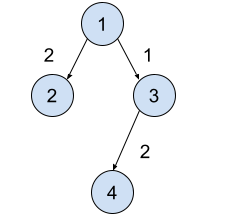
```
In the first test case,
test1

The signal will reach every node in 3 units of time.

In the second test case,
test2
```
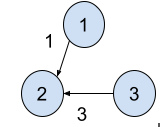
```

The signal will never reach node 3. So, print -1.
Sample Input 2:
2
4 5 3
3 1 2
3 4 3
1 4 1
1 2 1
2 4 2
2 1 1
1 2 5
Sample Output 2:
3
5
Explanation for sample input 2:
In the first test case, the signal will reach each node in 3 units of time.
In the second test case, the signal will reach each node in 5 units of time.
```

In [ ]:
import heapq

def networkDelayTime(edges, n, k):
    # To store the adjacency list of the given graph.
    adj = [list() for i in range(n + 1)]

    # Create the adjacency list.
    for u in edges:
        adj[u[0]].append([u[1], u[2]])

    INT_MAX = 2147483647

    # To store the shortest path length for each node from the source node 'K'.
    dist = [INT_MAX for i in range(n + 1)]
    dist[k] = 0

    pq = [[0, k]]
    # Min priority queue which stores the pair of path distance and the node itself.
    heapq.heapify(pq)

    while len(pq) > 0:
        # Extract the top element and pop it from the priority_queue.
        u = heapq.heappop(pq)
        w = u[0]
        v = u[1]

        if dist[v] < w:
            continue

        for edge in adj[v]:
            # Perform the weight relaxation.
            if dist[edge[0]] > dist[v] + edge[1]:
                dist[edge[0]] = dist[v] + edge[1]
                heapq.heappush(pq, [dist[edge[0]], edge[0]])

    # Get the maximum value.
    mn = 0
    for i in range(1, n + 1):
        mn = max(mn, dist[i])

    if mn == INT_MAX:
        return -1

    return mn

## Islands

```
An island is a small piece of land surrounded by water . A group of islands is said to be connected if we can reach from any given island to any other island in the same group . Given V islands (numbered from 0 to V-1) and E connections or edges between islands. Can you count the number of connected groups of islands.

Detailed explanation ( Input/output format, Notes, Images )
Input Format :
The first line of input contains two integers, that denote the value of V and E.
Each of the following E lines contains two integers, that denote that there exists an edge between vertex a and b.
Output Format :
Print the count the number of connected groups of islands
Constraints :
0 <= V <= 1000
0 <= E <= (V * (V-1)) / 2
0 <= a <= V - 1
0 <= b <= V - 1
Time Limit: 1 second
Sample Input 1:
5 8
0 1
0 4
1 2
2 0
2 4
3 0
3 2
4 3
Sample Output 1:
1
```

In [ ]:
import sys
sys.setrecursionlimit(10**9)

def dfs(node, graph, visited):
    visited[node] = True
    for neighbor in graph[node]:
        if not visited[neighbor]:
            dfs(neighbor, graph, visited)

def count_connected_groups(V, E, edges):
    graph = {i: [] for i in range(V)}
    for edge in edges:
        u, v = edge
        graph[u].append(v)
        graph[v].append(u)

    visited = [False] * V
    connected_groups = 0
    for i in range(V):
        if not visited[i]:
            dfs(i, graph, visited)
            connected_groups += 1

    return connected_groups

# Sample Input Parsing
V, E = map(int, input().split())
edges = []
for _ in range(E):
    a, b = map(int, input().split())
    edges.append((a, b))

# Count connected groups and print the result
print(count_connected_groups(V, E, edges))